In [1]:
# Import dependencies
import pandas as pd
import tensorflow as tf
import sklearn as skl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.metrics import r2_score

In [2]:
charity_df = pd.read_csv("./Resources/charity_data.csv")
charity_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(charity_df.dtypes)

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object


In [4]:
# Drop columns that we don't need
charity_df = charity_df.drop(columns=["EIN", "NAME"])

In [5]:
category_charity = charity_df.dtypes[charity_df.dtypes=="object"].index.tolist()

In [6]:
charity_df[category_charity].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [7]:
# Try bucketing
app_type_count = charity_df.APPLICATION_TYPE.value_counts()
app_type_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [8]:
bucket_app = list(app_type_count[app_type_count < 500].index)

for apps in bucket_app:
    charity_df.APPLICATION_TYPE = charity_df.APPLICATION_TYPE.replace(apps, "BUCKET")
    
charity_df.APPLICATION_TYPE.value_counts()

T3        27037
T4         1542
T6         1216
T5         1173
T19        1065
T8          737
T7          725
T10         528
BUCKET      276
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Try bucketing
class_count = charity_df.CLASSIFICATION.value_counts()
class_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1900        1
C2570        1
C3700        1
C1245        1
C6100        1
Name: CLASSIFICATION, Length: 71, dtype: int64

Will need to visulaize plot to determine how to bucket

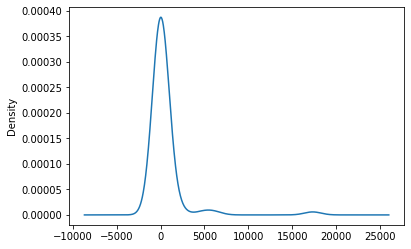

In [10]:
# Visualize with density plot
class_count.plot.density()

In [11]:
bucket_class = list(class_count[class_count < 500].index)

for classi in bucket_class:
    charity_df.CLASSIFICATION = charity_df.CLASSIFICATION.replace(classi, "BUCKET")
    
charity_df.CLASSIFICATION.value_counts()

C1000     17326
C2000      6074
C1200      4837
C3000      1918
C2100      1883
BUCKET     1484
C7000       777
Name: CLASSIFICATION, dtype: int64

In [12]:
charity_df[category_charity].nunique()

APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            7
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [13]:
# Encode the columns
enc = OneHotEncoder(sparse=False)

encoded = pd.DataFrame(enc.fit_transform(charity_df[category_charity]))

encoded.columns = enc.get_feature_names(category_charity)
encoded.head()

,APPLICATION_TYPE_BUCKET,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Merge one-hot encoded features and drop the originals
charity_df = charity_df.merge(encoded, left_index=True, right_index=True)
charity_df = charity_df.drop(category_charity,1)
charity_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_BUCKET,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Remove Is_Successful target from features data
y = charity_df.IS_SUCCESSFUL
X = charity_df.drop(columns=["IS_SUCCESSFUL"])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=79, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
# Create a neural network model with keras
nn = tf.keras.models.Sequential()

In [17]:
# Add a hidden layer with twice as many neurons as there are inputs. Use 'relu'
number_input_features = len(X.columns)
hidden_nodes_layer = 2*number_input_features

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer, activation='relu', input_dim=number_input_features))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [18]:
# add an output layer with a 'sigmoid' activation function.
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [19]:
# print a summary of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 88)                3960      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 89        
Total params: 4,049
Trainable params: 4,049
Non-trainable params: 0
_________________________________________________________________


In [20]:
# compile the model using the "adam" optimizer and "mean_squared_error" loss function
nn.compile(loss='mean_squared_error', optimizer='adam', metrics=["accuracy"])

In [21]:
y_train = np.asarray(y_train)

In [22]:
# train the model for 100 epochs 
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
25724/25724 [==============================] - 3s 114us/sample - loss: 0.1955 - acc: 0.7167
Epoch 2/100
25724/25724 [==============================] - 2s 66us/sample - loss: 0.1869 - acc: 0.7291
Epoch 3/100
25724/25724 [==============================] - 2s 69us/sample - loss: 0.1857 - acc: 0.7301
Epoch 4/100
25724/25724 [==============================] - 2s 60us/sample - loss: 0.1855 - acc: 0.7302
Epoch 5/100
25724/25724 [==============================] - 2s 60us/sample - loss: 0.1848 - acc: 0.7311
Epoch 6/100
25724/25724 [==============================] - 2s 66us/sample - loss: 0.1845 - acc: 0.7322
Epoch 7/100
25724/25724 [==============================] - 2s 64us/sample - loss: 0.1841 - acc: 0.7326
Epoch 8/100
25724/25724 [==============================] - 2s 63us/sample - loss: 0.1841 - acc: 0.7323
Epoch 9/100
25724/25724 [==============================] - 2s 71us/sample - loss: 0.1839 - acc: 0.7331
Epoch 10/100
25724/25724 [==============================] - 2s 61us/samp

25724/25724 [==============================] - 3s 100us/sample - loss: 0.1799 - acc: 0.7381
Epoch 80/100
25724/25724 [==============================] - 3s 101us/sample - loss: 0.1800 - acc: 0.7377
Epoch 81/100
25724/25724 [==============================] - ETA: 0s - loss: 0.1800 - acc: 0.739 - 2s 82us/sample - loss: 0.1801 - acc: 0.7391
Epoch 82/100
25724/25724 [==============================] - 2s 93us/sample - loss: 0.1799 - acc: 0.7393
Epoch 83/100
25724/25724 [==============================] - 2s 89us/sample - loss: 0.1798 - acc: 0.7388
Epoch 84/100
25724/25724 [==============================] - 2s 71us/sample - loss: 0.1798 - acc: 0.7374
Epoch 85/100
25724/25724 [==============================] - 2s 75us/sample - loss: 0.1800 - acc: 0.7380
Epoch 86/100
25724/25724 [==============================] - 2s 80us/sample - loss: 0.1797 - acc: 0.7386
Epoch 87/100
25724/25724 [==============================] - 2s 66us/sample - loss: 0.1799 - acc: 0.7392
Epoch 88/100
25724/25724 [===========

In [23]:
# create a deep learning model with two hidden layers. Use the same number of nodes as the neural network model.
# can go back to rerun more efficient number of nodes per layer
number_input_features = len(X.columns)
hidden_nodes_layer1 = 2*number_input_features
hidden_nodes_layer2 = hidden_nodes_layer1

# Create a neural network model with keras
dl = tf.keras.models.Sequential()

dl.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation='relu', input_dim=number_input_features))
dl.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

In [24]:
# add a sigmoid output node
dl.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [25]:
# print the deep learning model summary
dl.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 88)                3960      
_________________________________________________________________
dense_3 (Dense)              (None, 88)                7832      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 89        
Total params: 11,881
Trainable params: 11,881
Non-trainable params: 0
_________________________________________________________________


In [26]:
# compile the model
dl.compile(loss='mean_squared_error', optimizer='adam', metrics=["accuracy"])

In [27]:
# train the model for 100 epochs
fit_model = dl.fit(X_train_scaled,y_train,epochs=100)

model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
25724/25724 [==============================] - 2s 73us/sample - loss: 0.1909 - acc: 0.7242
Epoch 2/100
25724/25724 [==============================] - 2s 67us/sample - loss: 0.1861 - acc: 0.7296
Epoch 3/100
25724/25724 [==============================] - 2s 70us/sample - loss: 0.1850 - acc: 0.7318
Epoch 4/100
25724/25724 [==============================] - 2s 95us/sample - loss: 0.1841 - acc: 0.7329
Epoch 5/100
25724/25724 [==============================] - 2s 73us/sample - loss: 0.1836 - acc: 0.7319
Epoch 6/100
25724/25724 [==============================] - 2s 69us/sample - loss: 0.1832 - acc: 0.7337
Epoch 7/100
25724/25724 [==============================] - 2s 72us/sample - loss: 0.1828 - acc: 0.7333
Epoch 8/100
25724/25724 [==============================] - 2s 66us/sample - loss: 0.1823 - acc: 0.7347
Epoch 9/100
25724/25724 [==============================] - 2s 69us/sample - loss: 0.1821 - acc: 0.7355
Epoch 10/100
25724/25724 [==============================] - 2s 68us/sampl

25724/25724 [==============================] - 2s 74us/sample - loss: 0.1779 - acc: 0.7415
Epoch 80/100
25724/25724 [==============================] - 2s 78us/sample - loss: 0.1778 - acc: 0.7413
Epoch 81/100
25724/25724 [==============================] - 2s 75us/sample - loss: 0.1778 - acc: 0.7420
Epoch 82/100
25724/25724 [==============================] - 2s 75us/sample - loss: 0.1778 - acc: 0.7416
Epoch 83/100
25724/25724 [==============================] - 2s 75us/sample - loss: 0.1776 - acc: 0.7422
Epoch 84/100
25724/25724 [==============================] - 2s 77us/sample - loss: 0.1779 - acc: 0.7413
Epoch 85/100
25724/25724 [==============================] - 2s 71us/sample - loss: 0.1779 - acc: 0.7410
Epoch 86/100
25724/25724 [==============================] - 2s 75us/sample - loss: 0.1778 - acc: 0.7419
Epoch 87/100
25724/25724 [==============================] - 2s 72us/sample - loss: 0.1778 - acc: 0.7414
Epoch 88/100
25724/25724 [==============================] - 2s 69us/sample - 

Will a different loss metric give us better results?

In [28]:
# Making neural networks
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  24
hidden_nodes_layer2 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 24)                1080      
_________________________________________________________________
dense_6 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 13        
Total params: 1,393
Trainable params: 1,393
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
25724/25724 [==============================] - 2s 80us/sample - loss: 0.5911 - acc: 0.7020
Epoch 2/100
25724/25724 [==============================] - 2s 66us/sample - loss: 0.5573 - acc: 0.7271
Epoch 3/100
25724/25724 [==============================] - 2s 64us/sample - loss: 0.5533 - acc: 0.7294
Epoch 4/100
25724/25724 [==============================] - 2s 74us/sample - loss: 0.5505 - acc: 0.7311
Epoch 5/100
25724/25724 [==============================] - 2s 64us/sample - loss: 0.5494 - acc: 0.7317
Epoch 6/100
25724/25724 [==============================] - 2s 68us/sample - loss: 0.5477 - acc: 0.7324
Epoch 7/100
25724/25724 [==============================] - 2s 72us/sample - loss: 0.5473 - acc: 0.7314
Epoch 8/100
25724/25724 [==============================] - 2s 77us/sample - loss: 0.5459 - acc: 0.7327
Epoch 9/100
25724/25724 [==============================] - 2s 67us/sample - loss: 

25724/25724 [==============================] - 2s 87us/sample - loss: 0.5359 - acc: 0.7395
Epoch 77/100
25724/25724 [==============================] - 2s 84us/sample - loss: 0.5362 - acc: 0.7389
Epoch 78/100
25724/25724 [==============================] - 2s 81us/sample - loss: 0.5359 - acc: 0.7393
Epoch 79/100
25724/25724 [==============================] - 2s 90us/sample - loss: 0.5358 - acc: 0.7378
Epoch 80/100
25724/25724 [==============================] - 2s 87us/sample - loss: 0.5358 - acc: 0.7403
Epoch 81/100
25724/25724 [==============================] - 2s 68us/sample - loss: 0.5357 - acc: 0.7380
Epoch 82/100
25724/25724 [==============================] - 2s 70us/sample - loss: 0.5355 - acc: 0.7393
Epoch 83/100
25724/25724 [==============================] - 2s 72us/sample - loss: 0.5356 - acc: 0.7391
Epoch 84/100
25724/25724 [==============================] - 2s 68us/sample - loss: 0.5357 - acc: 0.7381
Epoch 85/100
25724/25724 [==============================] - 2s 68us/sample - 

In [30]:
# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=300)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/300
25724/25724 [==============================] - 2s 79us/sample - loss: 0.5350 - acc: 0.7388
Epoch 2/300
25724/25724 [==============================] - 2s 63us/sample - loss: 0.5347 - acc: 0.7390
Epoch 3/300
25724/25724 [==============================] - 2s 64us/sample - loss: 0.5346 - acc: 0.7391
Epoch 4/300
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5347 - acc: 0.7399
Epoch 5/300
25724/25724 [==============================] - 2s 66us/sample - loss: 0.5349 - acc: 0.7394
Epoch 6/300
25724/25724 [==============================] - 2s 64us/sample - loss: 0.5346 - acc: 0.7390
Epoch 7/300
25724/25724 [==============================] - 2s 64us/sample - loss: 0.5348 - acc: 0.7380
Epoch 8/300
25724/25724 [==============================] - 2s 64us/sample - loss: 0.5343 - acc: 0.7400
Epoch 9/300
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5346 - acc: 0.7395
Epoch 10/300
25724/25724 [==============================] - 2s 66us/sampl

25724/25724 [==============================] - 2s 88us/sample - loss: 0.5326 - acc: 0.7400
Epoch 80/300
25724/25724 [==============================] - 2s 87us/sample - loss: 0.5324 - acc: 0.7404
Epoch 81/300
25724/25724 [==============================] - 2s 87us/sample - loss: 0.5331 - acc: 0.7395
Epoch 82/300
25724/25724 [==============================] - 2s 81us/sample - loss: 0.5326 - acc: 0.7399
Epoch 83/300
25724/25724 [==============================] - 2s 82us/sample - loss: 0.5328 - acc: 0.7394
Epoch 84/300
25724/25724 [==============================] - 2s 80us/sample - loss: 0.5329 - acc: 0.7400
Epoch 85/300
25724/25724 [==============================] - 2s 68us/sample - loss: 0.5328 - acc: 0.7397
Epoch 86/300
25724/25724 [==============================] - 2s 78us/sample - loss: 0.5328 - acc: 0.7400
Epoch 87/300
25724/25724 [==============================] - 2s 70us/sample - loss: 0.5327 - acc: 0.7405
Epoch 88/300
25724/25724 [==============================] - 2s 87us/sample - 

25724/25724 [==============================] - 2s 73us/sample - loss: 0.5319 - acc: 0.7412
Epoch 158/300
25724/25724 [==============================] - 2s 73us/sample - loss: 0.5320 - acc: 0.7407
Epoch 159/300
25724/25724 [==============================] - 2s 77us/sample - loss: 0.5316 - acc: 0.7407
Epoch 160/300
25724/25724 [==============================] - 2s 83us/sample - loss: 0.5317 - acc: 0.7400
Epoch 161/300
25724/25724 [==============================] - 2s 62us/sample - loss: 0.5316 - acc: 0.7403
Epoch 162/300
25724/25724 [==============================] - 2s 64us/sample - loss: 0.5315 - acc: 0.7406
Epoch 163/300
25724/25724 [==============================] - 2s 69us/sample - loss: 0.5314 - acc: 0.7415
Epoch 164/300
25724/25724 [==============================] - 2s 62us/sample - loss: 0.5319 - acc: 0.7400
Epoch 165/300
25724/25724 [==============================] - 2s 70us/sample - loss: 0.5314 - acc: 0.7400
Epoch 166/300
25724/25724 [==============================] - 2s 92us/

25724/25724 [==============================] - 2s 84us/sample - loss: 0.5312 - acc: 0.7407
Epoch 236/300
25724/25724 [==============================] - 2s 75us/sample - loss: 0.5310 - acc: 0.7402
Epoch 237/300
25724/25724 [==============================] - 2s 74us/sample - loss: 0.5309 - acc: 0.7410
Epoch 238/300
25724/25724 [==============================] - 2s 79us/sample - loss: 0.5306 - acc: 0.7399
Epoch 239/300
25724/25724 [==============================] - 2s 59us/sample - loss: 0.5308 - acc: 0.7413
Epoch 240/300
25724/25724 [==============================] - 2s 67us/sample - loss: 0.5308 - acc: 0.7419
Epoch 241/300
25724/25724 [==============================] - 2s 72us/sample - loss: 0.5307 - acc: 0.7408
Epoch 242/300
25724/25724 [==============================] - 2s 61us/sample - loss: 0.5308 - acc: 0.7414
Epoch 243/300
25724/25724 [==============================] - 2s 80us/sample - loss: 0.5308 - acc: 0.7396
Epoch 244/300
25724/25724 [==============================] - 2s 75us/